In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We import a DataSet that shows Internet access by tech and by province

In [2]:
df = pd.read_csv('../DataSets/Internet_Accesos-por-tecnologia_y_pcia.csv', sep = ',')

Inspect the DataSet

In [3]:
df.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


Get an insight of it

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 60.9+ KB


See how many null values there are in our DataFrame and delete them

In [5]:
df.isna().sum()

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

Now check for any duplicate value

In [8]:
df.duplicated().sum()

0

Rename the columns for an easier read

In [9]:
dfColumns = {'Año': 'Year', 'Provincia': 'Province', 'Fibra óptica': 'Optic Fiber', 'Trimestre': 'Quarter', 'Otros': 'Others', 'Cablemodem': 'Cable modem'}

In [10]:
df.rename(columns = dfColumns, inplace = True)

In [11]:
df.head()

,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


Explore the `Year` & `Quarter` column to see its unique values

In [12]:
df['Quarter'].unique()

array(['4', '3', '2', '1', '3 *', '2 *', '1 *'], dtype=object)

In [13]:
df['Year'].unique()

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014'], dtype=object)

We see that there are some values with an '*`*`*', which we do not quite know its meaning.

We create a temporary DataFrame with only asterisk (`*`) values to better understand the data when deciding whether to discard them or not

In [14]:
asterisk = df[df['Quarter'].isin(['3 *', '2 *', '1 *'])]

In [20]:
asterisk.head(50)

,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
312,2019 *,3 *,Buenos Aires,1.0,2.0,425.0,86.0,27.0,4.0
313,2019 *,3 *,Capital Federal,300.0,1.0,25.0,4.0,31.0,1.0
314,2019 *,3 *,Catamarca,24.0,6.0,13.0,244.0,2.0,32.0
315,2019 *,3 *,Chaco,50.0,49.0,8.0,5.0,2.0,114.0
316,2019 *,3 *,Chubut,37.0,27.0,2.0,15.0,8.0,89.0
317,2019 *,3 *,Córdoba,308.0,399.0,30.0,37.0,9.0,783.0
318,2019 *,3 *,Corrientes,53.0,50.0,2.0,2.0,5.0,113.0
319,2019 *,3 *,Entre Ríos,95.0,96.0,13.0,19.0,15.0,238.0
320,2019 *,3 *,Formosa,22.0,8.0,1.0,14.0,162.0,46.0
321,2019 *,3 *,Jujuy,33.0,36.0,274.0,812.0,17.0,87.0


At first glance, these values seem to be just fine. We are going to keep them but first we'll do some data cleaning

We drop the *`*`* from the `Year` and `Quarter` columns

In [16]:
# We define a replace map
replace_mapping = {'3 *': '3', '2 *': '2', '1 *': '1'}

df['Quarter'] = df['Quarter'].replace(replace_mapping)

In [17]:
df['Quarter'].unique()

array(['4', '3', '2', '1'], dtype=object)

We do the same thing for the `Year` column, but just for the value _2019_

In [18]:
df['Year'] = df['Year'].replace('2019 *', '2019')

In [19]:
df['Year'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

In [21]:
df

,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


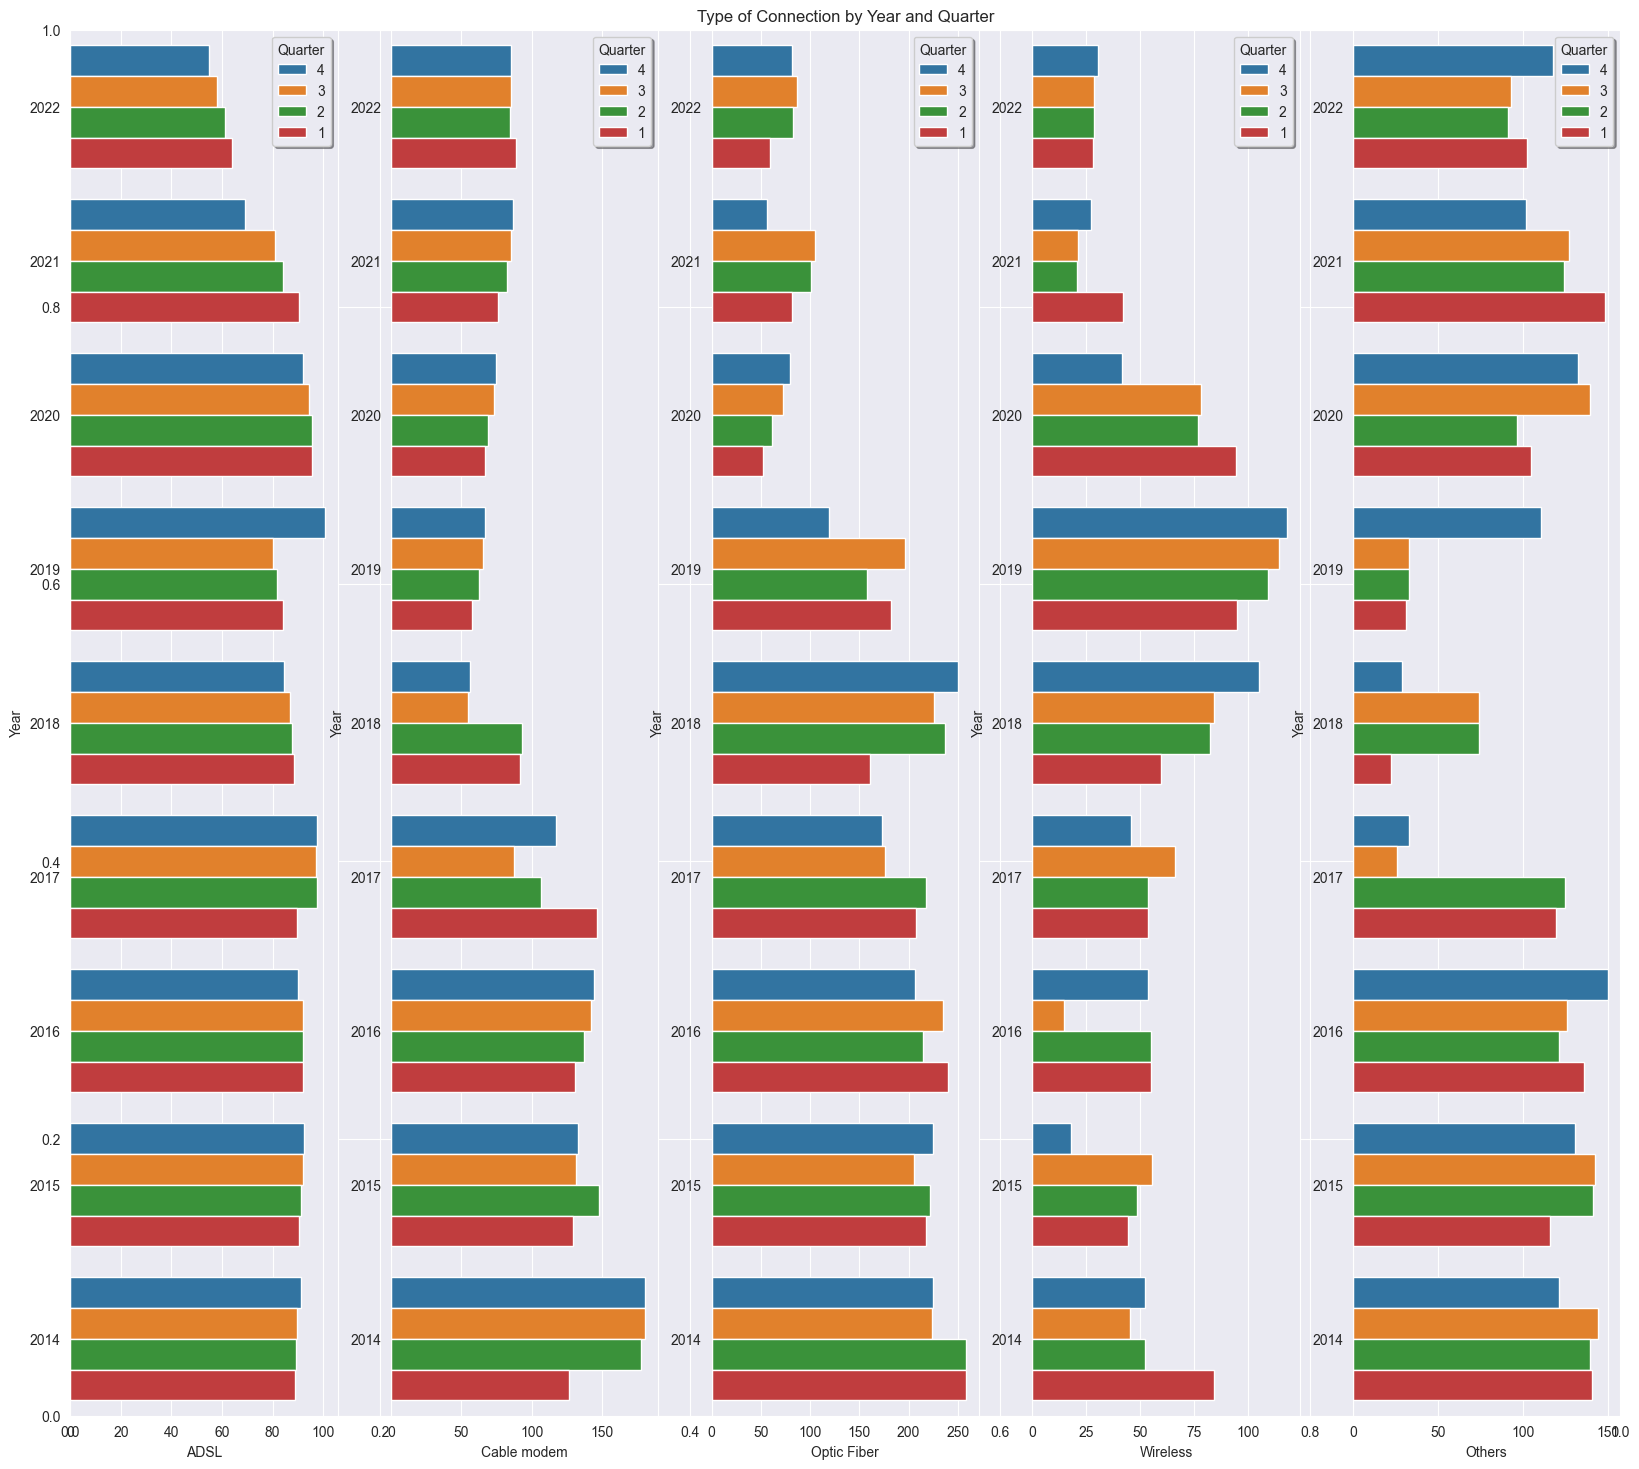

In [74]:
plt.figure(figsize = (20, 18))
plt.title('Type of Connection by Year and Quarter')
sns.set_style('darkgrid')


# ADSL barplot
plt.subplot(1, 5, 1)
sns.barplot(data = df, x = 'ADSL', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Cable modem barplot
plt.subplot(1, 5, 2)
sns.barplot(data = df, x = 'Cable modem', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Optic Fiber barplot
plt.subplot(1, 5, 3)
sns.barplot(data = df, x = 'Optic Fiber', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Wireless barplot
plt.subplot(1, 5, 4)
sns.barplot(data = df, x = 'Wireless', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Others barplot
plt.subplot(1, 5, 5)
sns.barplot(data = df, x = 'Others', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


plt.show()

## Some takeaways
<br>
 - Out of all the connection types, Wireless connection is the least popular throughout the years, although it saw a slight increase from 2018 to 2020